## Problem Statement
### 1. Perform Data Cleaning on data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'/home/jagdish/pytn/data science/sales of product(time series)/dataset/perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
#change collumn name
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
#checking dimenshion of data
df.shape

(107, 2)

In [6]:
#checking number of null value 
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
#checking last 5 rows of data set
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
#dropping the last row
df.drop(106,axis=0,inplace=True)

In [9]:
df.drop(105,axis=0,inplace=True)

In [10]:
#once again checking dim
df.shape

(105, 2)

In [11]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
#changing moth dtype
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
#Ml--numbers
#timeseries -Month

In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## 2. Checking Stationary Trend in Data
###     


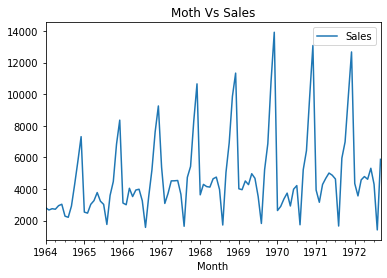

In [19]:
df.plot().get_figure()
plt.title("Moth Vs Sales")
plt.savefig('/home/jagdish/pytn/data science/sales of product(time series)/outputfiles/visualizations/fig1_SalesVsMonth')

In [20]:
#data is seasonal as we can see the pattern
# e.g:- in christmas -sales goes up 
# we can clearly say stationarity is no more available in data.

In [21]:
## test to check some kind of stationarity
#adfuller test, p value<0.05 -> data is statioary

In [22]:
!pip install statsmodels

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adfuller(df['Sales'])

(-1.8335930563276193,
 0.36391577166024686,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [25]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [26]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## How To make Data Stationary ?
### 1. How to Make your data differencing..?

In [82]:
df

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
...,...,...,...,...,...
1972-05-01,4618.0,-170.0,985.0,22.892180,4717.510947
1972-06-01,5312.0,694.0,1020.0,22.831310,4906.404029
1972-07-01,4298.0,-1014.0,144.0,22.804872,4685.436520


In [83]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [85]:
df['Sales first diff']=df['Sales']-df['Sales'].shift(1)

In [86]:
df.head()

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN


In [119]:
df['Seasonal first diff']=df['Sales']-df['Sales'].shift(12)

In [120]:
df.head()

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN


In [80]:
adfuller_test(df['Seasonal first diff'].dropna())

ADF Test Statistic : -0.9706415347205384
p-value : 0.7638209858973619
#Lags Used : 11
Number of Observations Used : 41
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


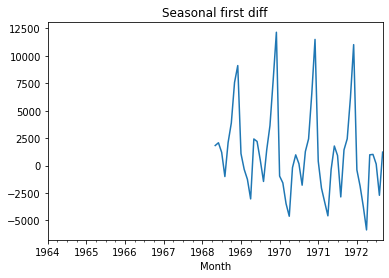

In [90]:
df['Seasonal first diff'].plot().get_figure()
plt.title("Seasonal first diff")
plt.savefig('/home/jagdish/pytn/data science/sales of product(time series)/outputfiles/visualizations/fig2_Seasonal first diff')

## Apply ARIMA Algorithm on data

 ARIMA -- AR + I + MA
 (p,d,q)
 p-> pacf graph
 d=1
 q= acf graph

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [36]:
#value of q
df.head(15)

,Sales,Sales first diff,Seasonal first diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


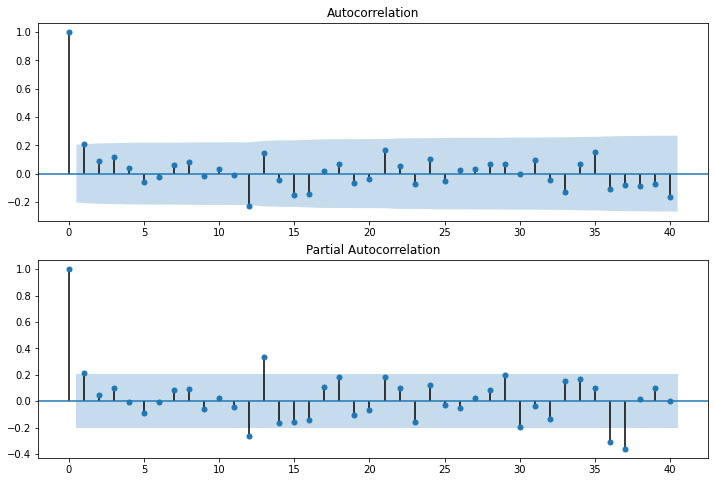

In [121]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Seasonal first diff'].iloc[13:],lags=40,ax=ax1)

ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first diff'].iloc[13:],lags=40,ax=ax2)


In [38]:
###(p,d,q)=(1,1,1)

In [93]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model = ARIMA(df['Sales'],order=(1,1,1))

/home/jagdish/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/jagdish/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

In [94]:
model=model.fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 02 May 2021   AIC                           1910.251
Time:                        20:15:51   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [95]:
df.shape

(105, 5)

In [96]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)

In [46]:
df.tail(20)

,Sales,Sales first diff,Seasonal first diff,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.075055
1971-08-01,1659.0,-2974.0,-79.0,218.366261
1971-09-01,5951.0,4292.0,730.0,107.734617
1971-10-01,6981.0,1030.0,557.0,59.682250


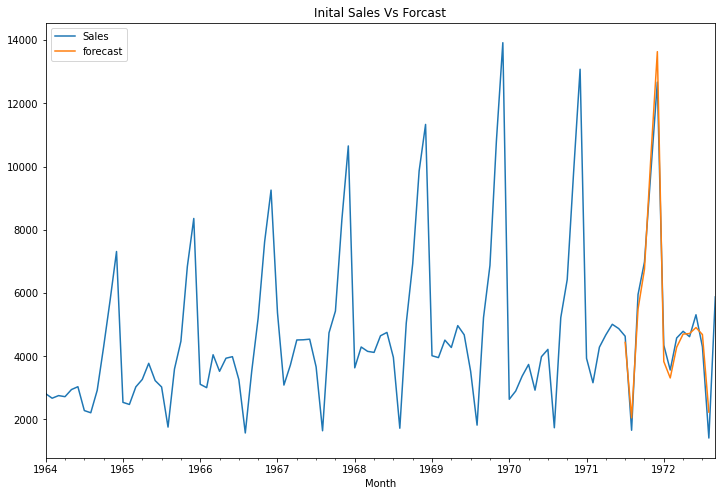

In [97]:
df[['Sales','forecast']].plot(figsize=(12,8)).get_figure()
plt.title("Inital Sales Vs Forcast")
plt.savefig('/home/jagdish/pytn/data science/sales of product(time series)/outputfiles/visualizations/fig_4_Inital_SalesVsForecast')


In [54]:
## seasonal data--ARIMA is not suitable for this case
# question is what kind of algorithm we have to consider if we are having seasonal use case
#SARIMAX -->Seasonal arima

In [98]:
import statsmodels.api as sm

In [99]:
#(p,d,q, shift_value)

In [122]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

/home/jagdish/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jagdish/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [123]:
results = model.fit()

In [124]:
df['forecast_SARIMAX']=results.predict(start=90,end=103,dynamic=True)

In [60]:
df.tail(20)

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.075055,4437.324917
1971-08-01,1659.0,-2974.0,-79.0,218.366261,2050.747660
1971-09-01,5951.0,4292.0,730.0,107.734617,5493.376584
1971-10-01,6981.0,1030.0,557.0,59.682250,6752.038865


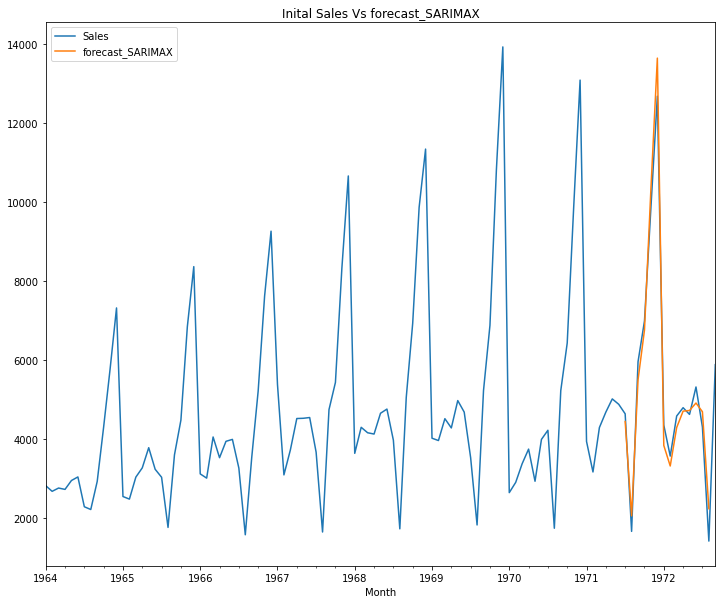

In [125]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10)).get_figure()
plt.title("Inital Sales Vs forecast_SARIMAX")
plt.savefig('/home/jagdish/pytn/data science/sales of product(time series)/outputfiles/visualizations/fig_5_Inital_SalesVsForecast_SARIMAX')

## Probelm Statement
### 1. Create additional dataset and do predictions over there..


In [128]:
## dateofset

In [129]:
from pandas.tseries.offsets import DateOffset
#creating additional data for 24 months

In [130]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [131]:
future_dates=[df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [132]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [133]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [134]:
future_dataset.tail()

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [135]:
future_df=pd.concat([df,future_dataset])

In [136]:
future_df.shape

(128, 5)

In [137]:
future_df['forecast_SARIMAX2']=results.predict(start=104,end=124,dynamic=True)

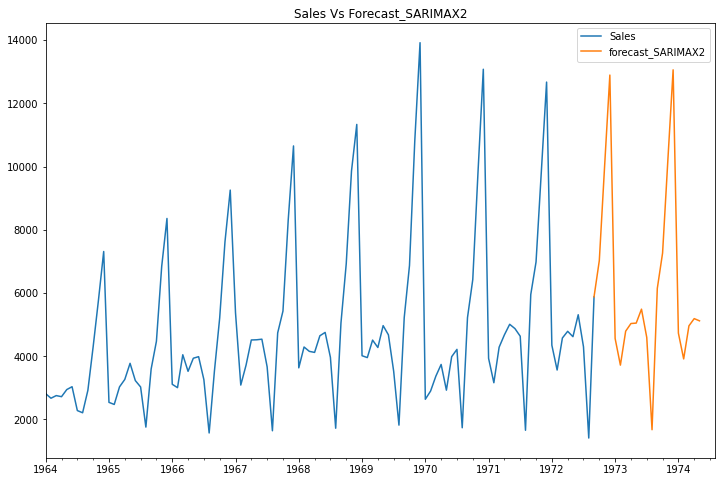

In [77]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,8)).get_figure()
plt.title('Sales Vs Forecast_SARIMAX2')
plt.savefig('/home/jagdish/pytn/data science/sales of product(time series)/outputfiles/visualizations/fig_6_Inital_SalesVsForecast_SARIMAX2')